# **Text Feature Exploration**

## **Group 13**

Anish George <br>
Drishya P Suresh <br>
Sashank Konathala <br>
Shora Ngarambe <br>

The purpose of this notebook is to explore whether we can use the lyrics to predict the mood of a song accurately and incorporate that in our recommendation system instead or in combination with valence.

# Import libraries

In [ ]:
#Pandas and Numoy libraries
import pandas as pd
import numpy as np

#Classifiers
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier

#Visualizations and metrics libraries
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#Language processing libraries
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import RegexpTokenizer
import re

import uuid

# Read in and clean the data

In [ ]:
dat = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/labeled_lyrics_cleaned.csv")
unique_ids = [str(uuid.uuid4().hex)[:8] for _ in range(len(dat))]
dat['id'] = unique_ids
print(dat.head())

   Unnamed: 0        artist  \
0           0  Elijah Blake   
1           1  Elijah Blake   
2           2  Elijah Blake   
3           3  Elijah Blake   
4           4  Elijah Blake   

                                                 seq                song  \
0  No, no\r\nI ain't ever trapped out the bando\r...            Everyday   
1  The drinks go down and smoke goes up, I feel m...    Live Till We Die   
2  She don't live on planet Earth no more\r\nShe ...       The Otherside   
3  Trippin' off that Grigio, mobbin', lights low\...               Pinot   
4  I see a midnight panther, so gallant and so br...  Shadows & Diamonds   

   label        id  
0  0.626  624cec74  
1  0.630  2c6ce421  
2  0.240  d738b9c5  
3  0.536  8ab82015  
4  0.371  29ebe3e8  


In [ ]:
dat

,Unnamed: 0,artist,seq,song,label,id
0,0,Elijah Blake,"No, no\r\nI ain't ever trapped out the bando\r...",Everyday,0.626,624cec74
1,1,Elijah Blake,"The drinks go down and smoke goes up, I feel m...",Live Till We Die,0.630,2c6ce421
2,2,Elijah Blake,She don't live on planet Earth no more\r\nShe ...,The Otherside,0.240,d738b9c5
3,3,Elijah Blake,"Trippin' off that Grigio, mobbin', lights low\...",Pinot,0.536,8ab82015
4,4,Elijah Blake,"I see a midnight panther, so gallant and so br...",Shadows & Diamonds,0.371,29ebe3e8
...,...,...,...,...,...,...
158348,158348,Adam Green,"And we live on borrowed time,\r\nBut this head...",Friends of Mine,0.737,56de8fe9
158349,158349,Adam Green,Frozin in time forever\r\nCarrying that torch ...,Frozen in Time,0.482,6de38bf5
158350,158350,Adam Green,Hard to be a girl. \r\nSo nice to be a boy. \r...,Hard to Be a Girl,0.733,8b0d90d6
158351,158351,Adam Green,"I want to chose to die,\r\nAnd be buried with ...",I Wanna Die,0.361,6a2b7cde


In [ ]:
# remove newline characters from seq column
dat['seq'] = dat['seq'].str.replace('\n', ' ')

In [ ]:
# create mood column with labels positive and negative based on valence label
dat['mood'] = np.where(dat['label'] > 0.5, 'positive', 'negative')

In [ ]:
# drop any rows with missing data and randomly select 45000 rows
dat = dat.dropna()
dat = dat.sample(n=45000, random_state=42)

In [ ]:
# create new column with cleaned text

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import RegexpTokenizer
import re

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
tokenizer = RegexpTokenizer(r'\w+')

def preprocess_text(text):
    # tokenize the text
    tokens = tokenizer.tokenize(text)
    # remove stop words
    tokens = [token for token in tokens if token.lower() not in stop_words]
    # stem words
    tokens = [ps.stem(token) for token in tokens]
    # join tokens back into text
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

dat['text_clean'] = dat['seq'].apply(preprocess_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#Extract Features

In [ ]:
# create document term matrix
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=800)

X = vectorizer.fit_transform(dat['text_clean']).toarray()

In [ ]:
dat

,Unnamed: 0,artist,seq,song,label,id,mood,text_clean
22257,22257,Kataklysm,This time we went to far\r This time we open t...,Face the Face of War,0.0397,478b54f2,negative,time went far time open scar feel destruct ins...
102069,102069,Four Year Strong,"Doo, doo, doo, doo, doo, doo, doo Doo, doo, do...",Semi-Charmed Life,0.5010,9650c0e3,positive,doo doo doo doo doo doo doo doo doo doo doo do...
130009,130009,Pretenders,When I change my life \r There'll be no more d...,When I Change My Life,0.7490,866f5071,positive,chang life disgrac deed past eras forgiv come ...
48836,48836,Audio Bullys,Urban ego war\r Urban suburban ego war\r It's ...,Ego War (Contains Hidden Track 'Somewhere in t...,0.9660,0e2d30de,positive,urban ego war urban suburban ego war ego war s...
108586,108586,The Sugarcubes,"This wasn't supposed to happen,\r I was happy ...",Hit,0.9340,ebc75bc6,positive,suppos happen happi accid seduc love lie bed t...
...,...,...,...,...,...,...,...,...
1389,1389,Dead to Fall,Are we going to die? I think so.\r Going nowhe...,Blood of the Moon,0.1760,8e8c5740,negative,go die think go nowher fast know tie beaten to...
112991,112991,The Stanley Brothers,The storm clouds rise no light in the sky\r An...,No Burdens Pass Through,0.5540,882a1915,positive,storm cloud rise light sky love one gone left ...
84471,84471,Tinted Windows,I just want you like it was before\r But nothi...,Take Me Back,0.5830,b001447d,positive,want like noth seem work anymor open suggest g...
61532,61532,Jaki Byard,Do you know what it means to miss New Orleans\...,Do You Know What It Means to Miss New Orleans?,0.0729,7e03539f,negative,know mean miss new orlean miss night day know ...


In [ ]:

# create document term matrix for Naive bayes for Bernouli converter
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=800)

Y = vectorizer.fit_transform(dat['text_clean']).toarray()


#Train Models and Display Visualizations

In [ ]:
# split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, dat['mood'], 
                                                    test_size=0.20, 
                                                    random_state=42)

In [ ]:
# split the data into training and testing sets for Naive Bayes
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(Y, dat['mood'], 
                                                    test_size=0.20, 
                                                    random_state=42)

In [ ]:

# convert to binary representation for Naive bayes
bernoulli_conv = lambda x: np.array(x>0).astype(int)
X_train_nb = np.apply_along_axis(bernoulli_conv, 0, X_train_nb)
X_test_nb = np.apply_along_axis(bernoulli_conv, 0, X_test_nb)


In [ ]:

# train the naive Bayes model
from sklearn.naive_bayes import BernoulliNB

nb = BernoulliNB(alpha=1, binarize=None, fit_prior=True, class_prior=None)
nb.fit(X_train_nb, y_train_nb)


BernoulliNB(alpha=1, binarize=None)

In [ ]:

# predict on the test data
y_pred_nb = nb.predict(X_test_nb)


Naive Bayes Metrics


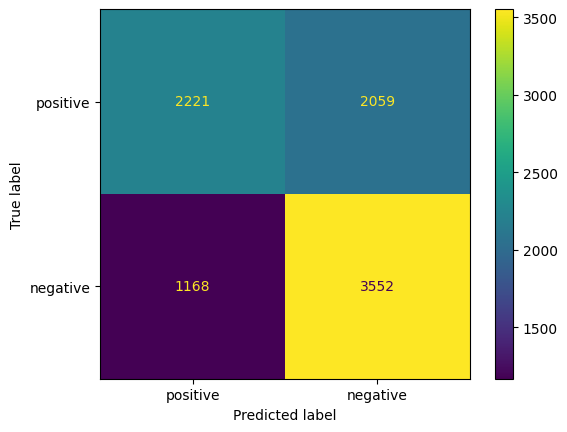


Accuracy score: 0.6414444444444445
Precision_score: 0.6441989002864426
Recall score: 0.6357338032631079
F1 Score: 0.6360774503654624


In [ ]:
# print the confusion matrix
cm_nb = confusion_matrix(y_test_nb, y_pred_nb, labels=['positive', 'negative'])
print("Naive Bayes Metrics")
disp=ConfusionMatrixDisplay(confusion_matrix=cm_nb,display_labels=['positive', 'negative'])
disp.plot()
plt.show()
print()
print("Accuracy score: "+str(accuracy_score(y_test_nb, y_pred_nb)))
print("Precision_score: "+str(precision_score(y_test_nb, y_pred_nb,average='macro')))
print("Recall score: "+str(recall_score(y_test_nb, y_pred_nb,average='macro')))
print('F1 Score: '+ str(f1_score(y_test_nb, y_pred_nb,average='weighted')))


In [ ]:
# train the Decision Tree MOdel
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# predict on the test data
y_pred_dt = dt_clf.predict(X_test)

Decision Tree Metrics


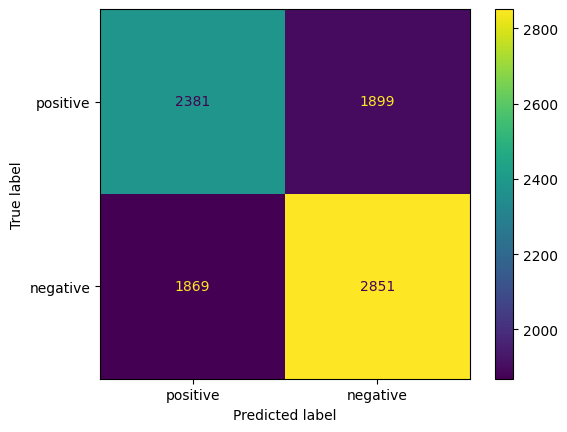


Accuracy score: 0.5813333333333334
Precision_score: 0.5802229102167182
Recall score: 0.5801669174718833
F1 Score: 0.5812602550247115


In [ ]:
# print the confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt, labels=['positive', 'negative'])
print("Decision Tree Metrics")
#print_metrics(classifier, prediction, test_transformer, test_labels_error, classifier_name)
disp=ConfusionMatrixDisplay(confusion_matrix=cm_dt,display_labels=['positive', 'negative'])
disp.plot()
plt.show()
print()
print("Accuracy score: "+str(accuracy_score(y_test, y_pred_dt)))
print("Precision_score: "+str(precision_score(y_test, y_pred_dt,average='macro')))
print("Recall score: "+str(recall_score(y_test, y_pred_dt,average='macro')))
print('F1 Score: '+ str(f1_score(y_test, y_pred_dt,average='weighted')))

#The accuracy of predicting the mood of a song using classification is too low to consider using it in the final deliverable. The accuracy for both Naive Bayes and Decision Trees are too low so we are going to continue with using valance instead for our recommender system.